In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#from  sklearn.model_selection import 

In [3]:
#from xgboost import 

Check frequency encoding and mean encoding for geocode, reverse geocode

In [4]:
train_data = pd.read_csv("train_data.csv")

test_data = pd.read_csv("test_data.csv")

In [37]:
train_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [43]:
train_data['Insured_Period'].value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
0.832877      28
0.246575      27
0.997260      26
0.994536      24
0.915068      23
0.161644      23
0.084932      22
0.967213      22
0.665753      21
0.983562      17
0.580822      16
0.413699      16
0.328767      13
0.751366      12
0.748634      12
0.915301      12
0.836066      10
0.248634       9
0.579235       9
0.494536       9
0.084699       8
0.502732       8
0.251366       8
0.163934       7
0.989071       6
            ... 
0.789617       1
0.978082       1
0.860274       1
0.341530       1
0.450820       1
0.663014       1
0.597260       1
0.534247       1
0.202186       1
0.994521       1
0.106849       1
0.295082       1
0.454795       1
0.435616       1
0.972678       1
0.805479       1
0.032787       1
0.901639       1
0.646575       1
0.434426       1
0.420765       1
0.453552       1
0.688525       1
0.484932       1
0.887978       1
0.680328       1
0.819672       1
0.792350      

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [29]:
train = train_data.copy()

In [30]:
test = test_data.copy()

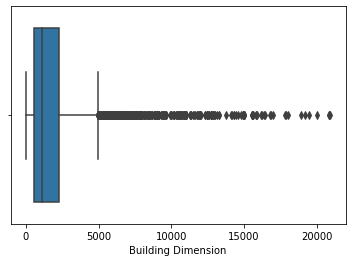

In [31]:
sns.boxplot(train['Building Dimension'])

In [33]:
train['Building Dimension'][train['Building Dimension']>5000] =5000

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
train['Building Dimension'].value_counts()

5000.0    528
400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
800.0      93
700.0      83
900.0      82
1200.0     81
350.0      76
1000.0     73
550.0      64
1300.0     62
250.0      62
2000.0     57
1100.0     55
1500.0     53
200.0      53
850.0      52
750.0      51
1800.0     50
650.0      50
1700.0     41
480.0      38
2100.0     34
460.0      33
1400.0     32
1600.0     32
950.0      32
         ... 
1635.0      1
3858.0      1
1175.0      1
3668.0      1
563.0       1
566.0       1
708.0       1
732.0       1
754.0       1
227.0       1
2640.0      1
1227.0      1
1029.0      1
3538.0      1
2760.0      1
3023.0      1
614.0       1
1499.0      1
2004.0      1
287.0       1
3768.0      1
421.0       1
3489.0      1
431.0       1
3265.0      1
1241.0      1
4780.0      1
3891.0      1
2860.0      1
881.0       1
Name: Building Dimension, Length: 1705, dtype: int64

In [35]:
train['Insured_Period'].value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
0.832877      28
0.246575      27
0.997260      26
0.994536      24
0.915068      23
0.161644      23
0.084932      22
0.967213      22
0.665753      21
0.983562      17
0.580822      16
0.413699      16
0.328767      13
0.751366      12
0.748634      12
0.915301      12
0.836066      10
0.248634       9
0.579235       9
0.494536       9
0.084699       8
0.502732       8
0.251366       8
0.163934       7
0.989071       6
            ... 
0.789617       1
0.978082       1
0.860274       1
0.341530       1
0.450820       1
0.663014       1
0.597260       1
0.534247       1
0.202186       1
0.994521       1
0.106849       1
0.295082       1
0.454795       1
0.435616       1
0.972678       1
0.805479       1
0.032787       1
0.901639       1
0.646575       1
0.434426       1
0.420765       1
0.453552       1
0.688525       1
0.484932       1
0.887978       1
0.680328       1
0.819672       1
0.792350      

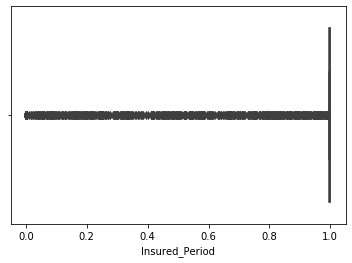

In [36]:
sns.boxplot(train['Insured_Period'])

In [38]:
train['Insured_Period'][train['Insured_Period']<0.9]=0.9

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
train['Insured_Period'].value_counts()

1.000000    5325
0.900000    1081
0.997268     547
0.997260      26
0.994536      24
0.915068      23
0.967213      22
0.983562      17
0.915301      12
0.989071       6
0.986301       6
0.953425       5
0.920765       5
0.912568       4
0.912329       4
0.901370       3
0.917808       3
0.989041       2
0.906849       2
0.961644       2
0.964384       2
0.958904       2
0.909589       2
0.926027       2
0.942466       2
0.947945       2
0.950685       2
0.953552       2
0.991781       1
0.956164       1
0.923288       1
0.967123       1
0.942623       1
0.975342       1
0.931507       1
0.928962       1
0.945205       1
0.936986       1
0.937158       1
0.956284       1
0.909836       1
0.907104       1
0.964481       1
0.961749       1
0.945355       1
0.950820       1
0.994521       1
0.972603       1
0.972678       1
0.901639       1
0.978082       1
0.969863       1
0.934247       1
Name: Insured_Period, dtype: int64

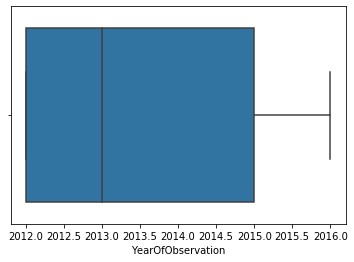

In [11]:
import seaborn as sns
sns.boxplot(train['YearOfObservation'])

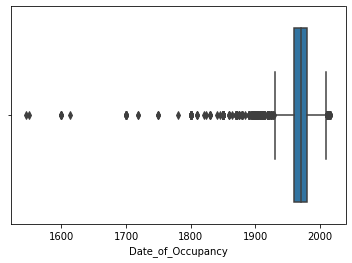

In [15]:
ns.boxplot(train['Date_of_Occupancy'])

In [40]:
train['Date_of_Occupancy'].value_counts()

1960.0    1818
1980.0    1155
1988.0     530
1900.0     371
1970.0     285
1950.0     245
1930.0     167
1920.0     100
1990.0      98
2011.0      97
2009.0      89
2008.0      74
2010.0      65
2012.0      62
2007.0      58
1940.0      53
1965.0      52
2000.0      52
1975.0      52
1850.0      49
2005.0      37
2004.0      35
1985.0      34
1972.0      33
2003.0      33
2006.0      31
1995.0      31
1978.0      31
1910.0      28
2001.0      27
          ... 
1903.0       2
1952.0       2
1924.0       2
2016.0       2
1820.0       1
1550.0       1
1914.0       1
1929.0       1
1906.0       1
1613.0       1
1923.0       1
1902.0       1
1824.0       1
1928.0       1
1780.0       1
1884.0       1
1846.0       1
1934.0       1
1905.0       1
1938.0       1
1919.0       1
1926.0       1
1840.0       1
1545.0       1
1864.0       1
1908.0       1
1946.0       1
1939.0       1
1931.0       1
1927.0       1
Name: Date_of_Occupancy, Length: 134, dtype: int64

In [ ]:
train['Date_of_Occupancy'][train['Date_of_Occupancy']]

In [8]:
train_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [9]:
train_data["Building Dimension"].isnull().sum()

106

In [10]:
train_data['NumberOfWindows'].value_counts() #about half of this column is .

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [11]:
train_data['Claim'].value_counts() #This is an imbalanced dataset

0    5526
1    1634
Name: Claim, dtype: int64

In [14]:
#plt.hist(train_data['Settlement'], label =['satisfaction level'])

#plt.legend()
#plt.savefig('dfleftsatisfaction_left1')

(array([4973.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2187.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

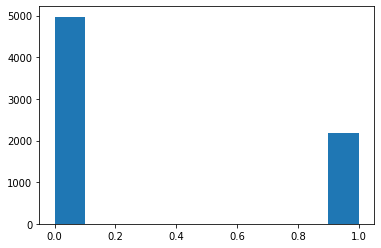

In [15]:
#Residential

plt.hist(train_data['Residential'], label =['Res'])


In [16]:
train_data['Residential'].value_counts()

0    4973
1    2187
Name: Residential, dtype: int64

(array([4973.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2187.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

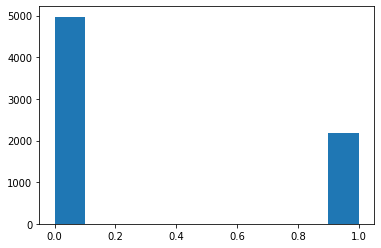

In [17]:
plt.hist(train_data['Residential'])

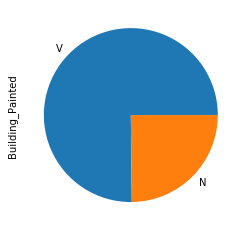

In [18]:
train_data['Building_Painted'].value_counts().plot(kind='pie')

In [19]:
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


Text(0.5, 1.0, 'Comparison of Building Painted')

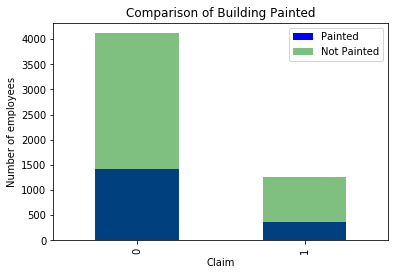

In [20]:
train_data[train_data['Building_Painted']=='N']['Claim'].value_counts().plot(kind = 'bar',color='blue',label = "Painted"  )

train_data[train_data['Building_Painted']=='V']['Claim'].value_counts().plot(kind = 'bar', color='green', alpha=.5 , label="Not Painted")

plt.legend()

plt.xlabel('Claim')
plt.ylabel('Number of employees')
plt.title('Comparison of Building Painted')

Text(0.5, 1.0, 'Comparison of Building_Fenced')

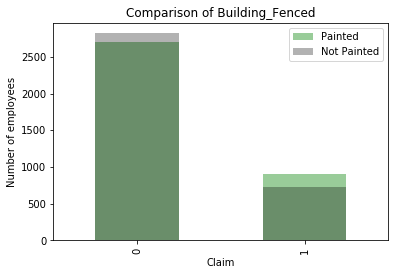

In [21]:
train_data[train_data['Building_Fenced']=='N']['Claim'].value_counts().plot(kind = 'bar',color='green',alpha=0.4,label = "Painted"  )

train_data[train_data['Building_Fenced']=='V']['Claim'].value_counts().plot(kind = 'bar', color='black', alpha=.3 , label="Not Painted")

plt.legend()

plt.xlabel('Claim')
plt.ylabel('Number of employees')
plt.title('Comparison of Building_Fenced')

In [22]:
train_data[train_data['Building_Fenced']=='N']['Claim'].value_counts()

train_data[train_data['Building_Fenced']=='V']['Claim'].value_counts()

0    2819
1     733
Name: Claim, dtype: int64

In [23]:
train_data['Building Dimension'].value_counts()

400.0      150
500.0      120
300.0      118
450.0      117
600.0      114
800.0       93
700.0       83
900.0       82
1200.0      81
350.0       76
1000.0      73
550.0       64
1300.0      62
250.0       62
2000.0      57
1100.0      55
1500.0      53
200.0       53
850.0       52
750.0       51
1800.0      50
650.0       50
1700.0      41
480.0       38
2100.0      34
460.0       33
1400.0      32
1600.0      32
950.0       32
2500.0      30
          ... 
123.0        1
3872.0       1
4523.0       1
4858.0       1
183.0        1
8140.0       1
4074.0       1
6813.0       1
3275.0       1
3145.0       1
5007.0       1
3508.0       1
4530.0       1
3241.0       1
6307.0       1
1499.0       1
1725.0       1
2515.0       1
10207.0      1
1922.0       1
4625.0       1
4432.0       1
1736.0       1
508.0        1
691.0        1
211.0        1
3324.0       1
1228.0       1
3762.0       1
1734.0       1
Name: Building Dimension, Length: 2043, dtype: int64

In [24]:
train_data['Geo_Code'].value_counts()

6088     143
33063    137
6083     113
13206     98
31555     87
63113     83
13205     83
21231     76
83137     70
42218     66
92004     61
13001     59
13201     58
34172     57
38185     57
13207     56
54395     52
13204     52
75116     52
64483     49
91174     48
75114     47
67482     46
51454     46
64122     45
75117     45
2A004     42
94068     42
75115     41
13202     41
        ... 
33143      1
42225      1
95539      1
30028      1
56181      1
21166      1
29239      1
78297      1
95394      1
78358      1
6044       1
86137      1
57751      1
67389      1
77337      1
57757      1
13002      1
67169      1
83086      1
84031      1
6901       1
38057      1
9029       1
91649      1
73099      1
77285      1
63308      1
67414      1
76410      1
47004      1
Name: Geo_Code, Length: 1307, dtype: int64

In [25]:
train_data['Building_Type'].value_counts()

2    3305
1    1716
3    1230
4     909
Name: Building_Type, dtype: int64

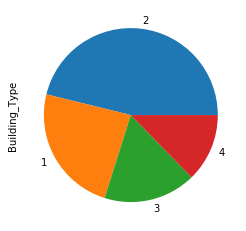

In [26]:
train_data['Building_Type'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Comparison of Building_Fenced')

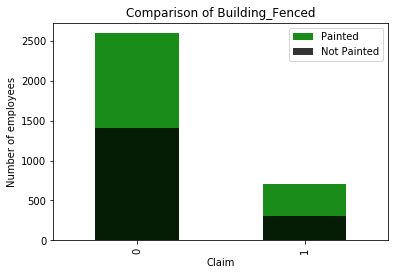

In [27]:
train_data[train_data['Building_Type']==2]['Claim'].value_counts().plot(kind = 'bar',color='green',alpha=0.9,label = "Painted"  )

train_data[train_data['Building_Type']==1]['Claim'].value_counts().plot(kind = 'bar', color='black', alpha=.8 , label="Not Painted")

plt.legend()

plt.xlabel('Claim')
plt.ylabel('Number of employees')
plt.title('Comparison of Building_Fenced')

In [28]:
train_data['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [29]:
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [5]:
list_year= []

for i in train_data['YearOfObservation']:
    x = 2018-i
    list_year.append(x)
    

In [14]:
train_data['Year'] = list_year

In [16]:
train_data['Date_of_Occupancy'].value_counts()

1960.0    1818
1980.0    1155
1988.0     530
1900.0     371
1970.0     285
1950.0     245
1930.0     167
1920.0     100
1990.0      98
2011.0      97
2009.0      89
2008.0      74
2010.0      65
2012.0      62
2007.0      58
1940.0      53
1965.0      52
2000.0      52
1975.0      52
1850.0      49
2005.0      37
2004.0      35
1985.0      34
1972.0      33
2003.0      33
2006.0      31
1995.0      31
1978.0      31
1910.0      28
2001.0      27
          ... 
1903.0       2
1952.0       2
1924.0       2
2016.0       2
1820.0       1
1550.0       1
1914.0       1
1929.0       1
1906.0       1
1613.0       1
1923.0       1
1902.0       1
1824.0       1
1928.0       1
1780.0       1
1884.0       1
1846.0       1
1934.0       1
1905.0       1
1938.0       1
1919.0       1
1926.0       1
1840.0       1
1545.0       1
1864.0       1
1908.0       1
1946.0       1
1939.0       1
1931.0       1
1927.0       1
Name: Date_of_Occupancy, Length: 134, dtype: int64

In [11]:
Date = []

for i in train_data['Date_of_Occupancy']:
    
    if i<=1890 and i>=1500:
        Date.append(i)
    else:
        
        

In [15]:
train_data['x'] = Date

ValueError: Length of values does not match length of index

In [64]:
Date_occupancy = []

for i in train_data['Date_of_Occupancy']:
    x = 2018 - i
    Date_occupancy.append(x)

In [62]:
train_data['Year']= list_year
train_data['Date_occupancy'] = Date_occupancy

In [66]:
train_data['Date_occupancy'].value_counts()

others    7160
Name: Date_occupancy, dtype: int64

In [49]:
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Year,Date_occupancy
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0,5,58.0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0,3,168.0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0,4,58.0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0,5,58.0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0,4,218.0


In [44]:
train_dum=pd.get_dummies(train_data,columns=['Building_Painted', 'Building_Fenced','Garden','Settlement'])

In [45]:
train_dum.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Year,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_O,Garden_V,Settlement_R,Settlement_U
0,H14663,2013,1.0,0,290.0,1,1960.0,.,1053,0,5,1,0,0,1,0,1,0,1
1,H2037,2015,1.0,0,490.0,1,1850.0,4,1053,0,3,0,1,1,0,1,0,1,0
2,H3802,2014,1.0,0,595.0,1,1960.0,.,1053,0,4,1,0,0,1,0,1,0,1
3,H3834,2013,1.0,0,2840.0,1,1960.0,.,1053,0,5,0,1,0,1,0,1,0,1
4,H5053,2014,1.0,0,680.0,1,1800.0,3,1053,0,4,0,1,1,0,1,0,1,0


In [46]:
train_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 19 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
Year                  7160 non-null int64
Building_Painted_N    7160 non-null uint8
Building_Painted_V    7160 non-null uint8
Building_Fenced_N     7160 non-null uint8
Building_Fenced_V     7160 non-null uint8
Garden_O              7160 non-null uint8
Garden_V              7160 non-null uint8
Settlement_R          7160 non-null uint8
Settlement_U          7160 non-null uint8
dtypes: float64(3), int64(5), object(3), uint8(8)
memory usage: 671.3+ KB
